Objective:
The objective of this assessment is to evaluate your understanding and ability to apply supervised learning techniques to a real-world dataset.

Dataset:
Use the breast cancer dataset available in the sklearn library.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

# Convert the dataset into a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)


In [5]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [7]:
# Add the target column
df['target'] = data.target

In [9]:
df.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0


In [11]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [13]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


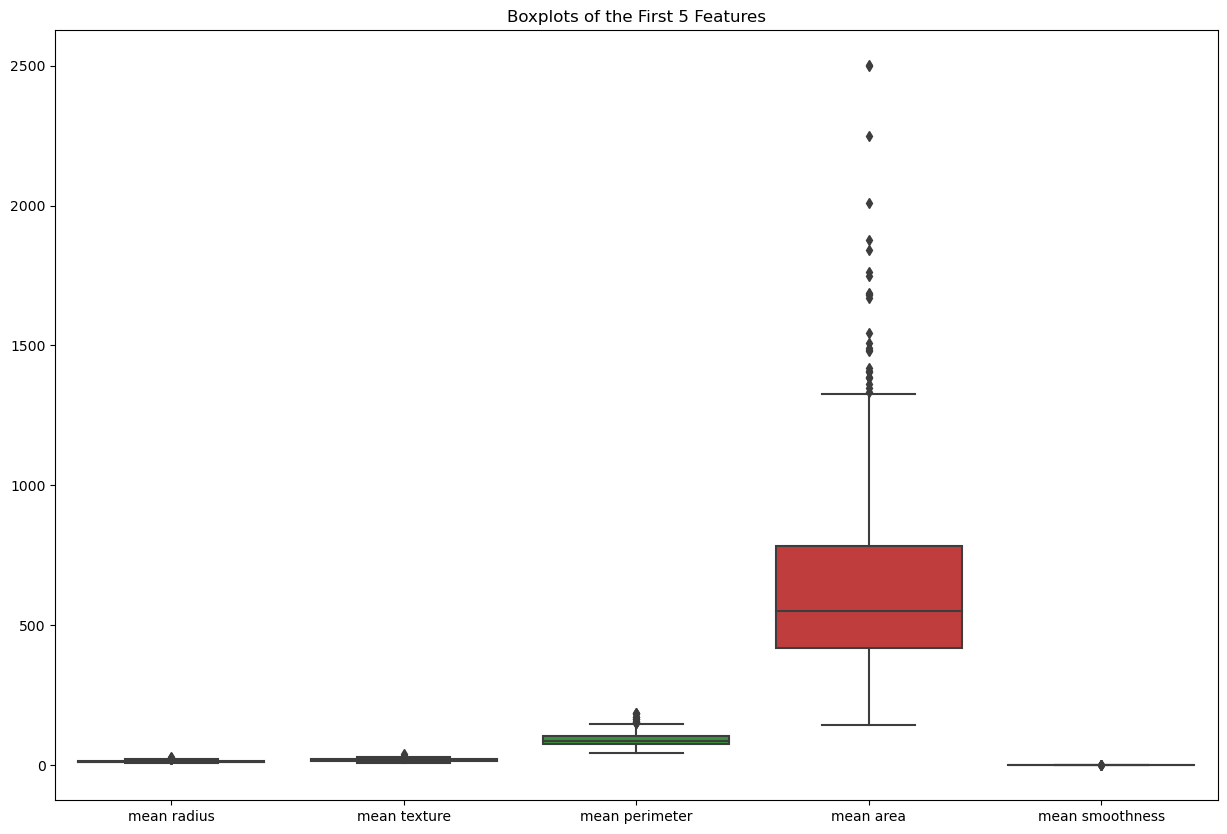

In [15]:
# Plot boxplots for the first 5 features
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.iloc[:, :5])
plt.title("Boxplots of the First 5 Features")
plt.show()

In [17]:
# Checking the range (min and max) of the first 5 features
print(df.iloc[:, :5].agg(['min', 'max']))


     mean radius  mean texture  mean perimeter  mean area  mean smoothness
min        6.981          9.71           43.79      143.5          0.05263
max       28.110         39.28          188.50     2501.0          0.16340


In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale all feature columns (excluding the 'target' column)
scaled_features = scaler.fit_transform(df.drop(columns='target'))

# Convert the scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])

# Add the target column back to the scaled data
scaled_df['target'] = df['target']

# Check the scaled data
print(scaled_df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

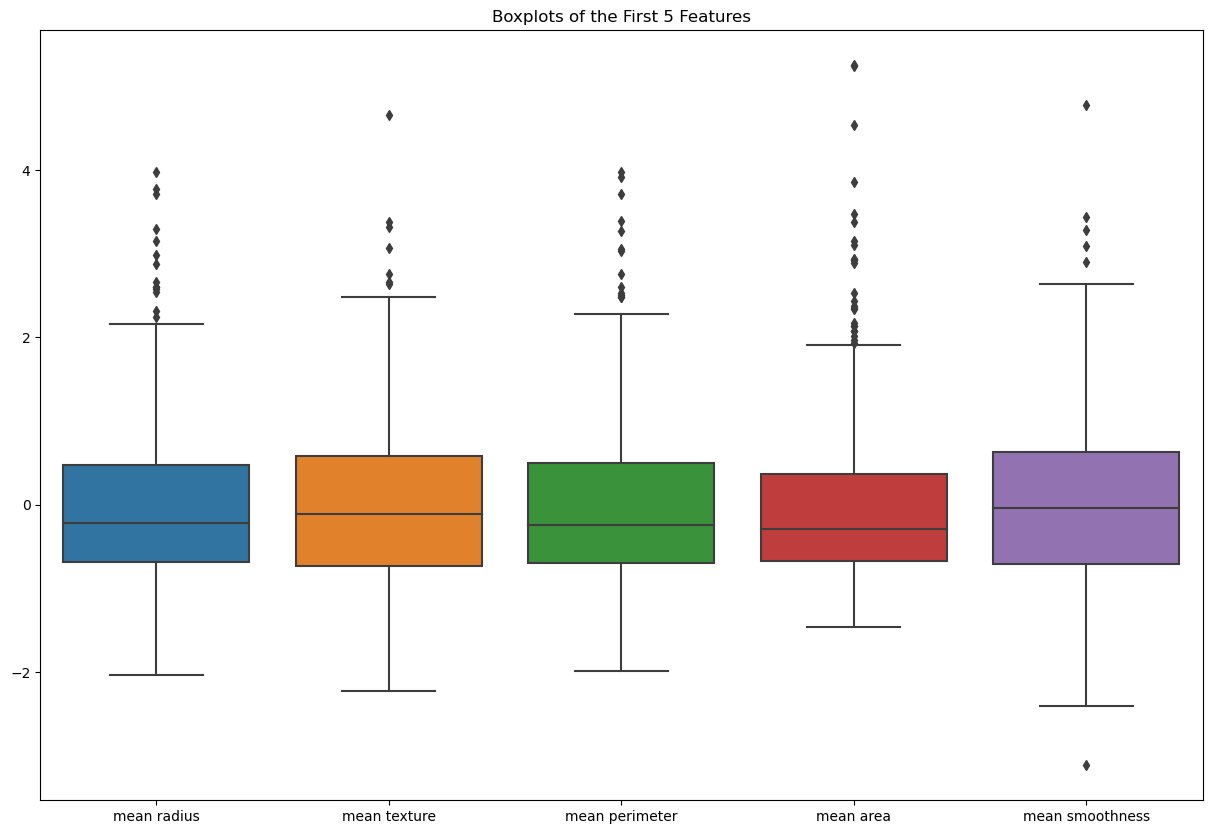

In [21]:
# Plot boxplots for the first 5 features
plt.figure(figsize=(15, 10))
sns.boxplot(data=scaled_df.iloc[:, :5])
plt.title("Boxplots of the First 5 Features")
plt.show()


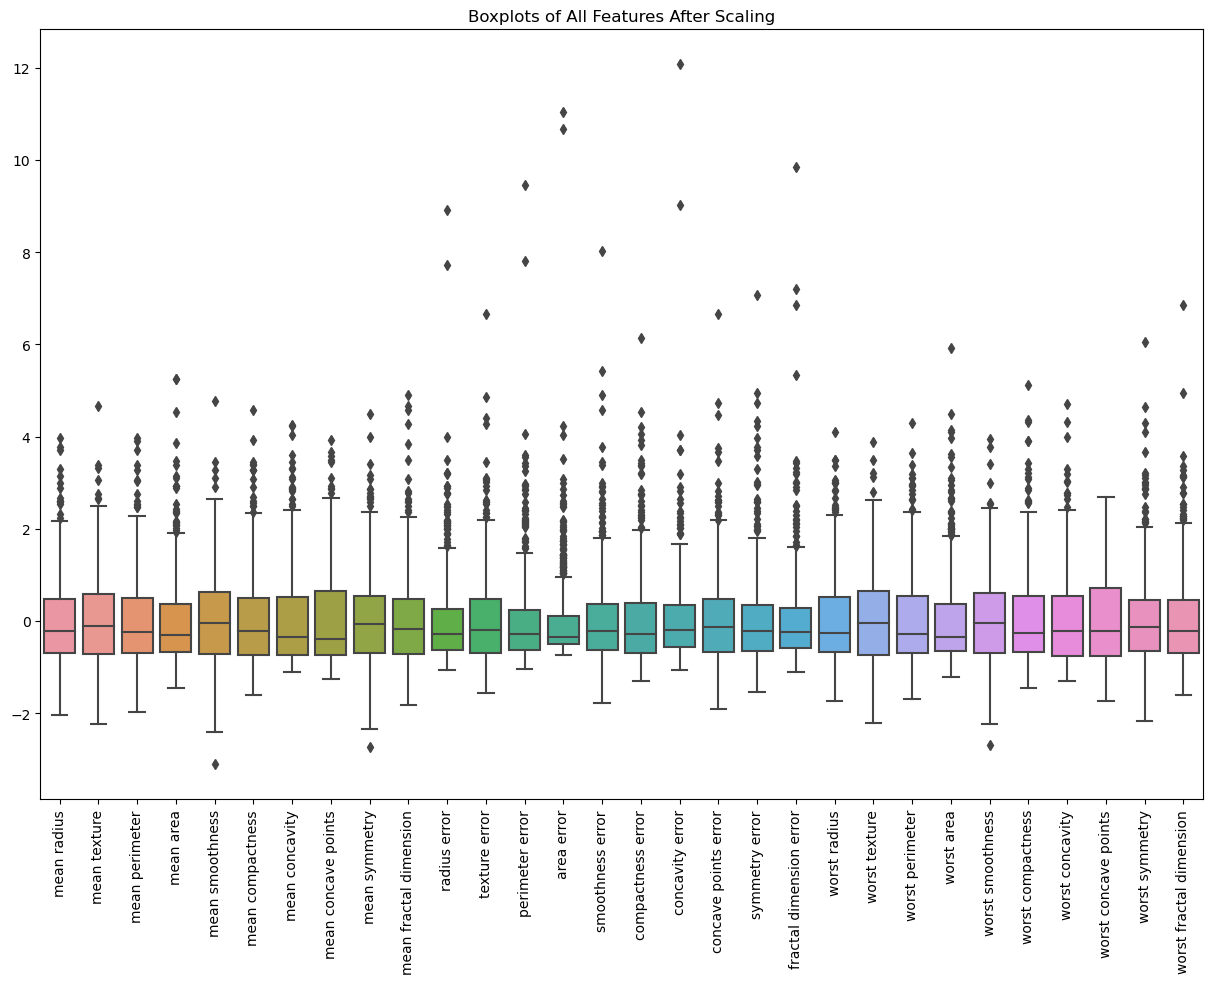

In [23]:
# Plot boxplots for all features (excluding 'target')
plt.figure(figsize=(15, 10))
sns.boxplot(data=scaled_df.drop(columns='target'))
plt.title("Boxplots of All Features After Scaling")
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.show()


In [25]:
# Function to handle outliers using IQR
def handle_outliers_iqr(df):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Clip the values outside the bounds
    df_clipped = df.clip(lower=lower_bound, upper=upper_bound, axis=1)
    
    return df_clipped

# Apply IQR-based outlier handling to the scaled data
scaled_df_no_outliers = handle_outliers_iqr(scaled_df)

# Display the first few rows of the cleaned data
scaled_df_no_outliers.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,2.355271,2.430777,2.532475,2.217515,2.255747,...,-1.359293,2.303601,1.857177,1.307686,2.370797,2.109526,2.296076,2.088141,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.857177,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,2.656942,2.355271,1.915897,1.451707,2.381807,2.261417,...,0.133984,-0.249939,-0.550021,2.530708,2.370797,1.989588,2.175786,2.088141,2.164774,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


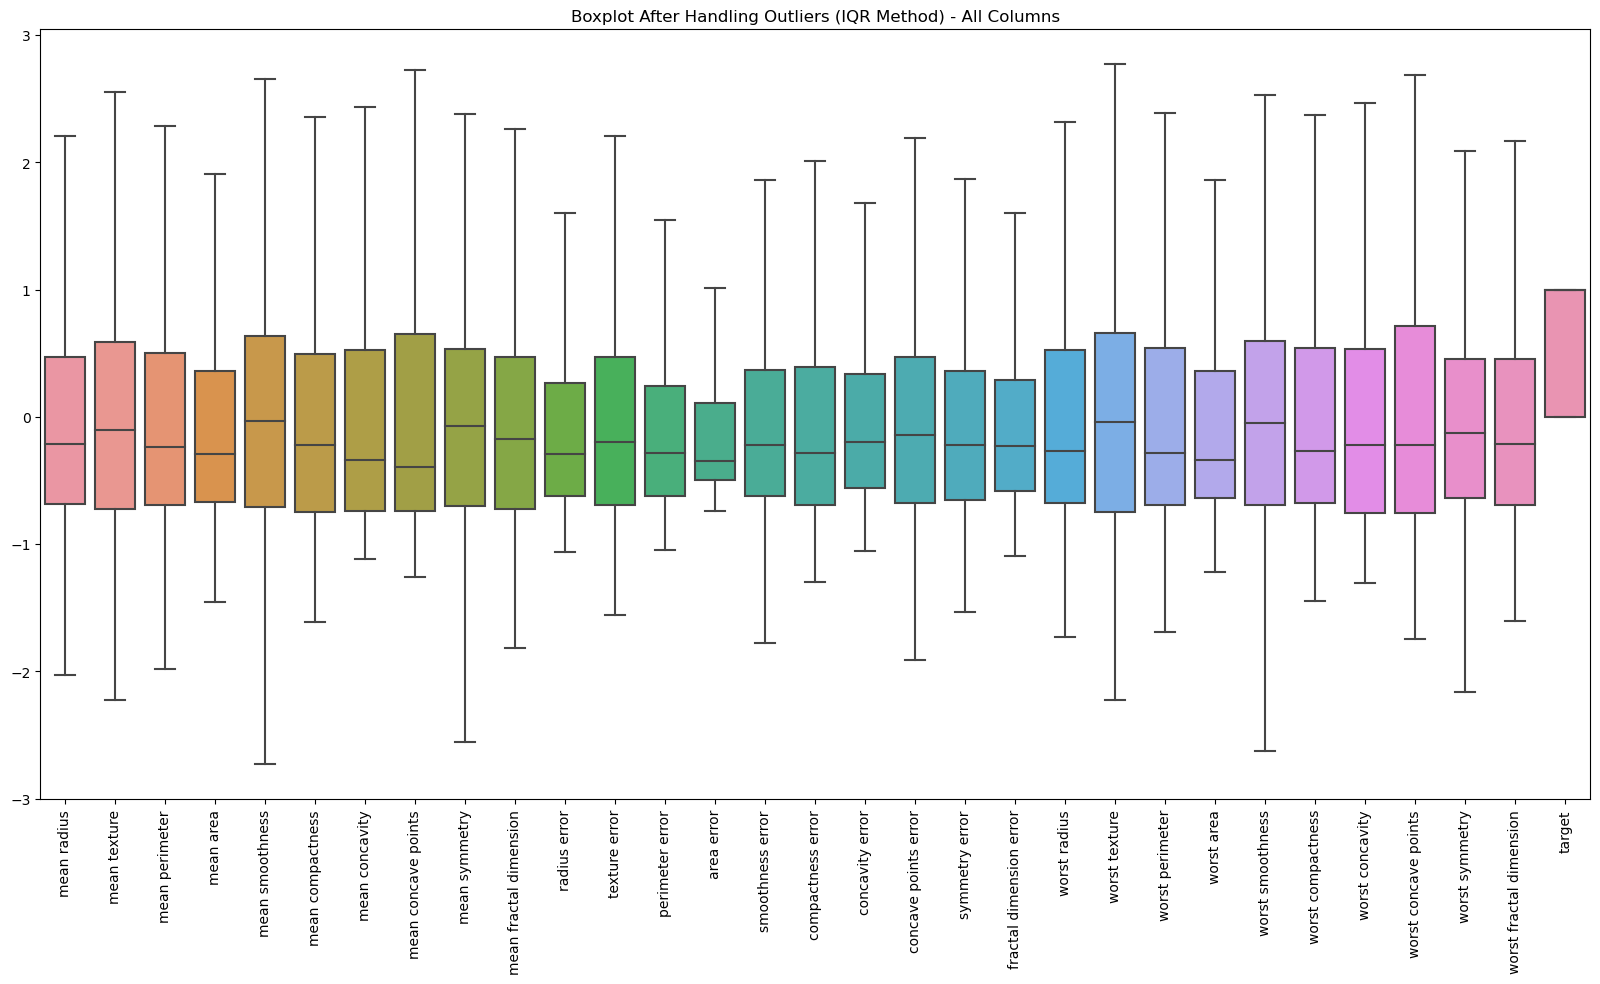

In [27]:
# Plot boxplots for all columns to visualize the effect of outlier handling
plt.figure(figsize=(20, 10))
sns.boxplot(data=scaled_df_no_outliers)
plt.title("Boxplot After Handling Outliers (IQR Method) - All Columns")
plt.xticks(rotation=90)  # Rotate column names for better readability
plt.show()

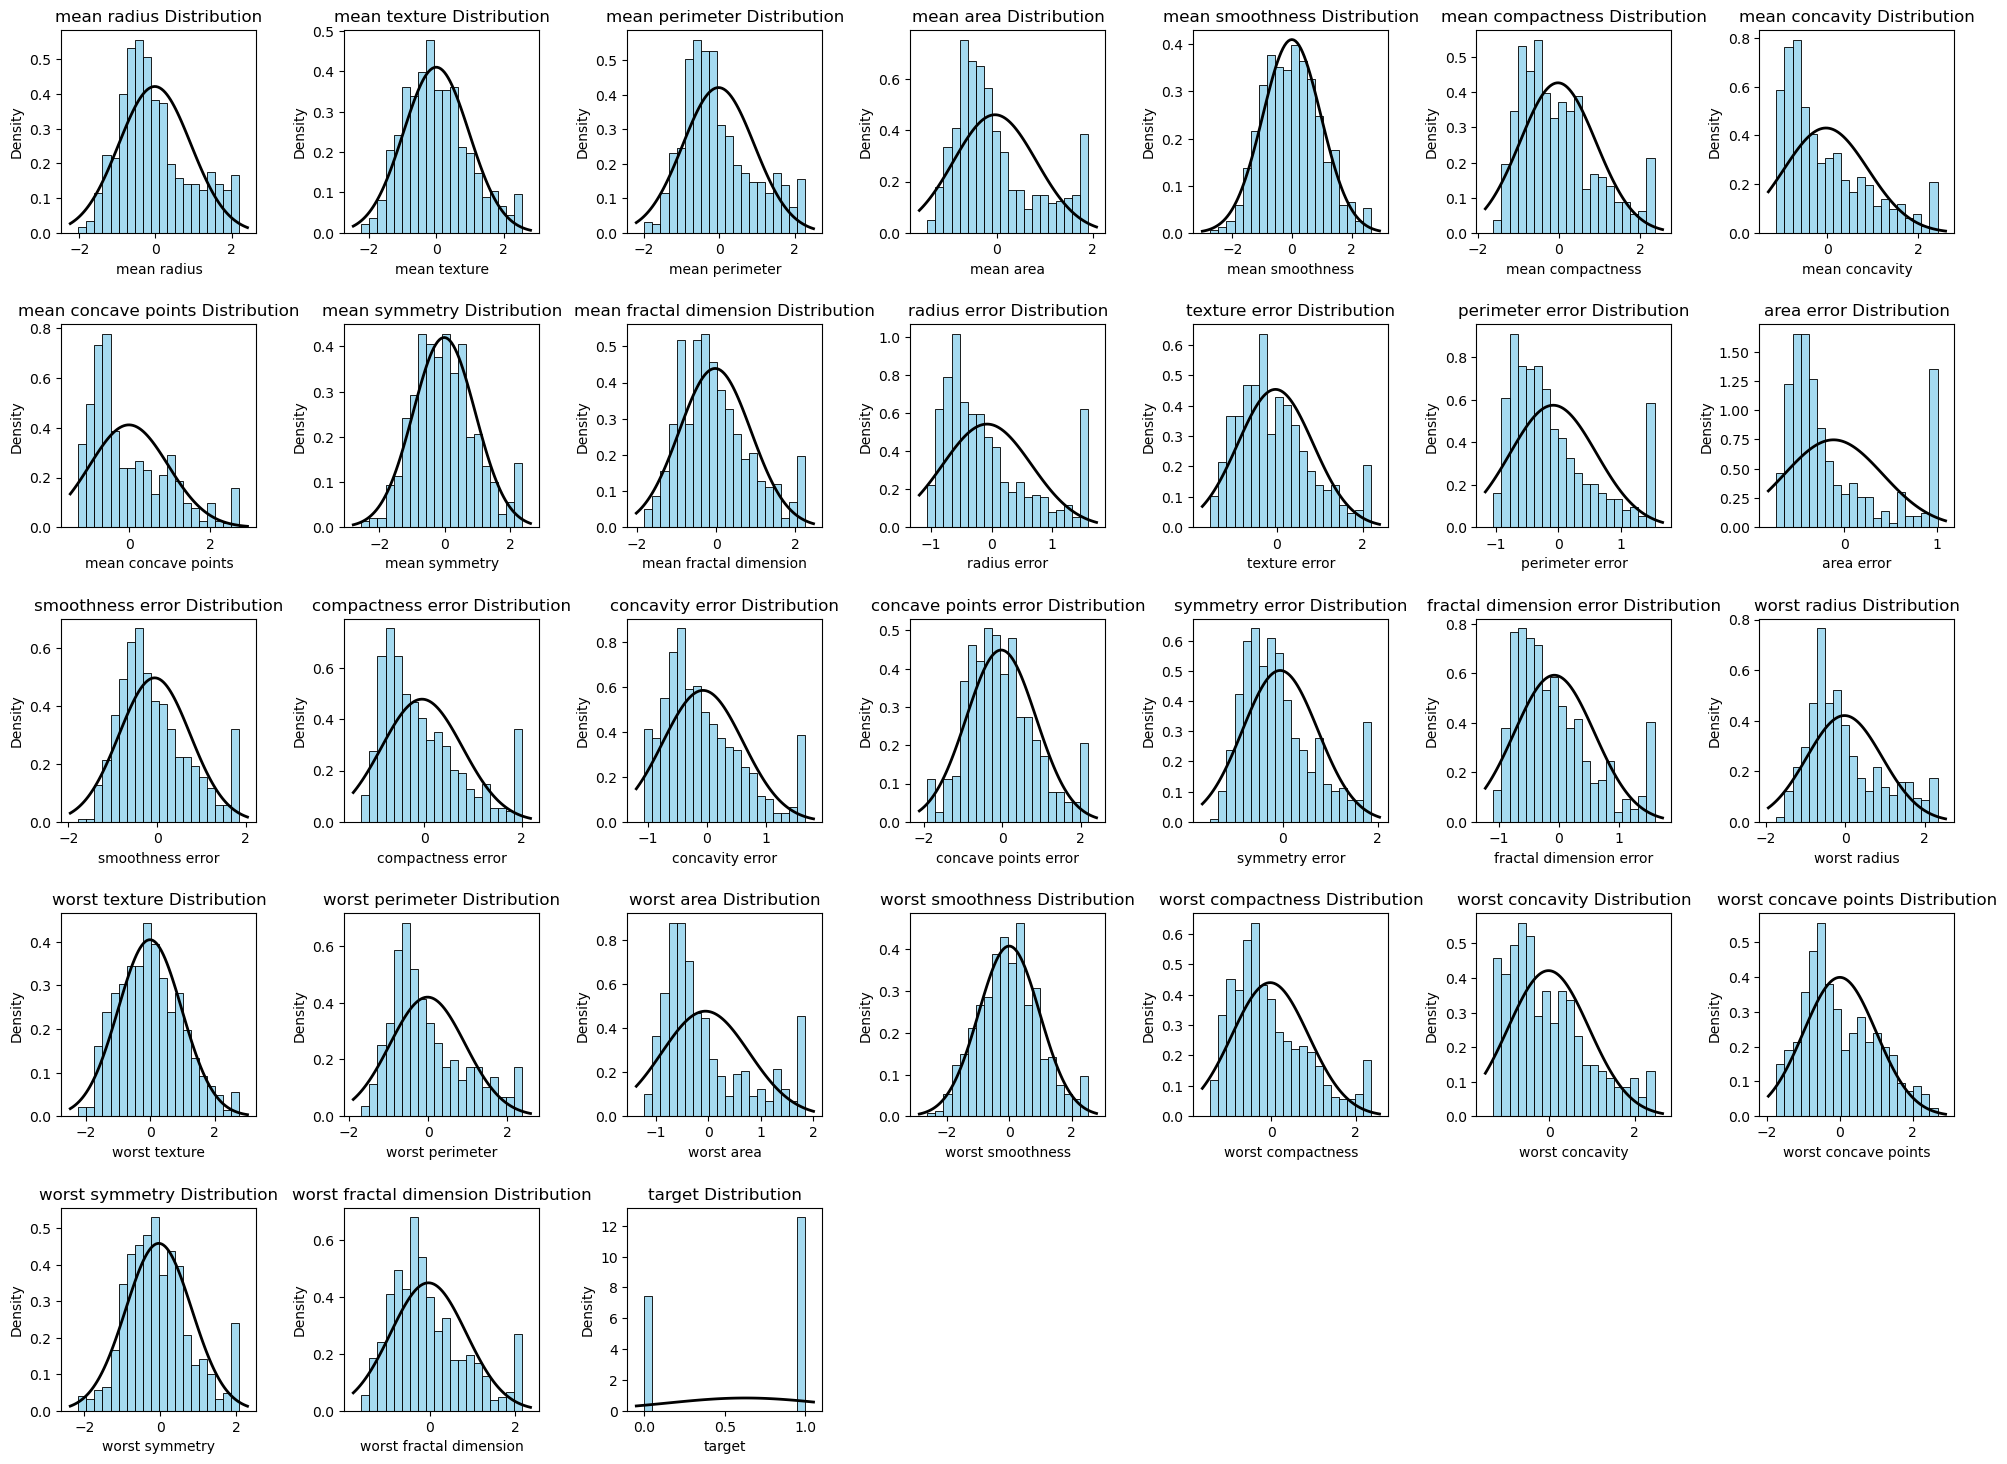

In [29]:
from scipy.stats import norm
import warnings

# Suppress specific UserWarnings (tight_layout)
warnings.filterwarnings("ignore", category=UserWarning, message=".*tight_layout.*")

# Create a figure with subplots for each column (adjust size as needed)
plt.figure(figsize=(20, 15))

# Loop through each column to plot histograms
for i, column in enumerate(scaled_df_no_outliers.columns):
    plt.subplot(5, 7, i+1)  # 5 rows, 7 columns of subplots (adjust if needed)
    
    # Plot the histogram
    sns.histplot(scaled_df_no_outliers[column], kde=False, bins=20, color='skyblue', stat='density')
    
    # Overlay the bell curve (normal distribution)
    mu, std = norm.fit(scaled_df_no_outliers[column])  # Fit a normal distribution to the data
    xmin, xmax = plt.xlim()  # Get the current x-axis limits
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)  # Get the probability density function
    plt.plot(x, p, 'k', linewidth=2)  # Plot the normal distribution curve
    
    plt.title(f"{column} Distribution")

# Adjust layout to avoid overlap
plt.tight_layout(pad=2.0)

# Show the plot
plt.show()


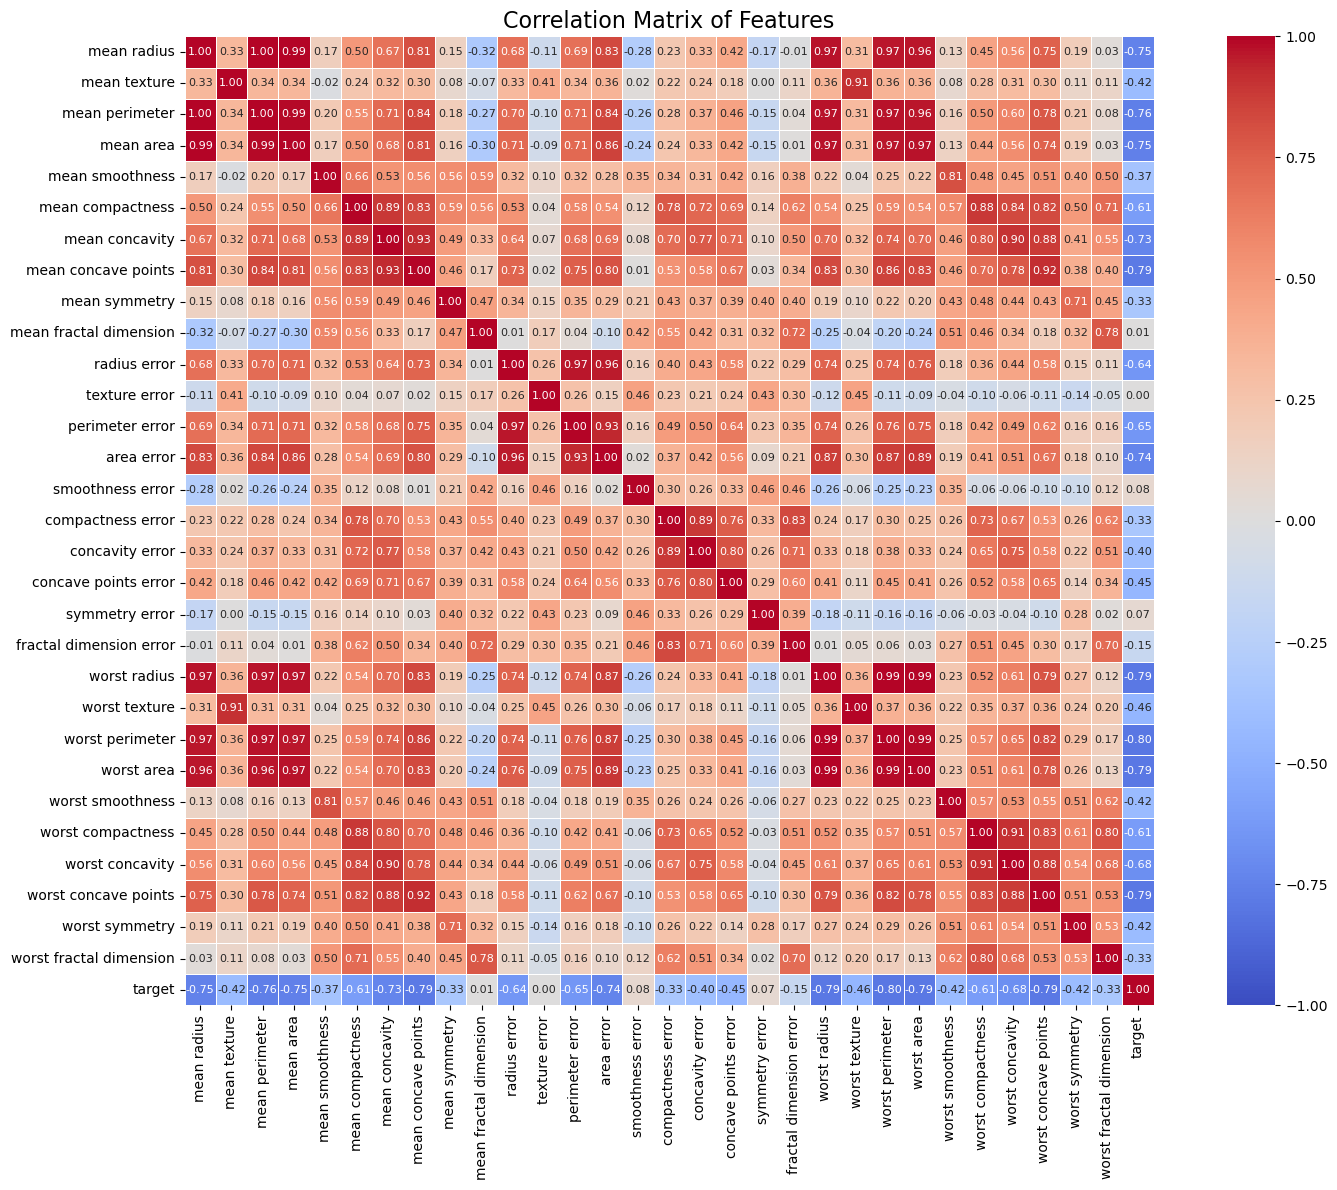

In [31]:
# Compute the correlation matrix
corr_matrix = scaled_df_no_outliers.corr()

# Increase the figure size for better readability
plt.figure(figsize=(16, 12))  # Increase the figure size

# Rotate the axis labels for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True, square=True, 
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, 
            annot_kws={"size": 8},  # Reduce font size
            vmin=-1, vmax=1)  # Set correlation range between -1 and 1

# Title and show plot
plt.title("Correlation Matrix of Features", fontsize=16)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.yticks(rotation=0)  # Rotate y-axis labels
plt.tight_layout()  # Ensure everything fits in the figure

# Show the plot
plt.show()


#Preprocessing Steps 

1. Loading and Conversion to DataFrame
Step:The load_breast_cancer() dataset was loaded and converted into a Pandas DataFrame for easier data manipulation and analysis.
Working with a Pandas DataFrame provides a structured format for data analysis, allowing for operations like visualization, scaling, and outlier handling.

2. Adding the Target Column:
Step: The target column was added to the DataFrame.
This ensures the target labels (malignant or benign) are included for supervised learning and evaluation.

3. Checking for Missing and Duplicate Data:
Steps: Checked for null values using df.isnull().sum().
Checked for duplicate rows using df.duplicated().sum().
Missing values and duplicate rows can cause biases or errors in analysis and model training. In this case, there were no null or duplicate rows, so no cleaning was required.

4. Exploratory Data Analysis:
Steps: Boxplots were created to visualize the distribution of features and detect outliers.
Min and max values for the first 5 features were calculated to understand their range.
EDA helps identify patterns, anomalies, and outliers in the data, which can affect downstream analysis and modeling.

5. Feature Scaling:
Step: Used StandardScaler to standardize feature values by scaling them to have a mean of 0 and a standard deviation of 1.
Many machine learning models, like logistic regression and SVM, perform better when features are on a similar scale. Without scaling, features with larger magnitudes could dominate others, leading to biased results.


6. Outlier Handling (IQR Method)
Step: Outliers were handled using the Interquartile Range (IQR) method, clipping values beyond 1.5 times the IQR to the lower and upper bounds.
Outliers can skew the analysis and adversely impact the performance of machine learning models. Clipping ensures the data is more robust and less sensitive to extreme values while preserving most of the distribution.

7. Visualization of Distributions
Steps:Histograms with normal distribution curves were plotted for each feature.
This helped verify if the data follows a normal distribution after scaling and outlier handling. Normality can be beneficial for certain machine learning models that assume normally distributed data.

8. Correlation Analysis
Step: A heatmap of the correlation matrix was generated to analyze the relationships between features.
Identifying highly correlated features helps detect multicollinearity. Features with strong correlations can sometimes be removed or combined to reduce redundancy, simplifying the model without significant loss of information.


Importance of These Preprocessing Steps:

Improved Data Quality: Scaling, outlier handling, and ensuring no duplicates or missing values lead to cleaner data.

Model Readiness: Preprocessing ensures the dataset is ready for modeling, reducing biases and improving performance.

Feature Insights: Correlation analysis aids feature selection and engineering, optimizing the dataset for predictive tasks.

#train test split

In [35]:
# Define features and target
X = scaled_df_no_outliers.drop(columns=['target'], errors='ignore')  # Processed feature data
y = df['target']           # Target column

# Import train_test_split
from sklearn.model_selection import train_test_split

# Perform the split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("Training Features Shape:", x_train.shape)
print("Testing Features Shape:", x_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (455, 30)
Testing Features Shape: (114, 30)
Training Target Shape: (455,)
Testing Target Shape: (114,)


#LogisticRegression

In [37]:
from sklearn.linear_model import LogisticRegression

In [39]:
model_1 = LogisticRegression()
model_1.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_pred = model_1.predict(x_test)

In [43]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [45]:
y_test

204    1
70     0
131    0
431    1
540    1
      ..
486    1
75     0
249    1
238    1
265    0
Name: target, Length: 114, dtype: int32

Accuracy: 0.9824561403508771
Confusion Matrix:
 [[42  1]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<Axes: >

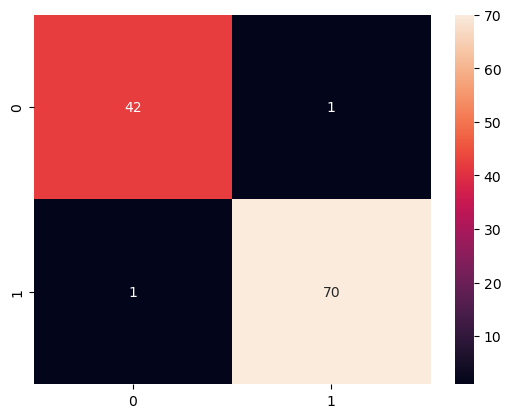

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

sns.heatmap(conf_matrix,annot=True)


1. Logistic Regression
How it works:
Logistic Regression is a linear model that predicts probabilities using the logistic (sigmoid) function. It outputs a value between 0 and 1, representing the likelihood of a data point belonging to a specific class. It is widely used for binary classification tasks.

Why it’s suitable:

The dataset is binary (malignant or benign), which fits perfectly with logistic regression.
Logistic regression performs well when the classes are linearly separable or nearly so.
It provides interpretable coefficients for feature importance.

#DecisionTreeClassifier

2. Decision Tree Classifier
How it works:
Decision Trees split the data based on feature thresholds, creating a tree structure that partitions the data into homogeneous groups. The final leaf nodes represent the predicted class.

Why it’s suitable:

Decision trees can handle non-linear relationships between features and the target variable.
They work well even if some features are irrelevant, as the tree can ignore those during splitting.
Easy to interpret, providing clear decision-making logic.


In [53]:
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier(random_state = 42,max_depth = 10)
model_2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [55]:
y_pred_dt = model_2.predict(x_test)

Accuracy: 0.9473684210526315
Confusion Matrix:
 [[40  3]
 [ 3 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



<Axes: >

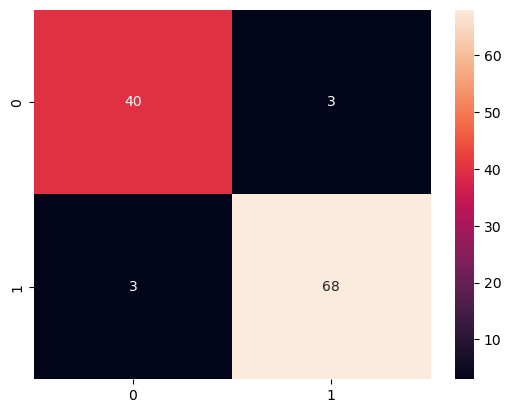

In [57]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)
class_report = classification_report(y_test, y_pred_dt)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

sns.heatmap(conf_matrix,annot=True)


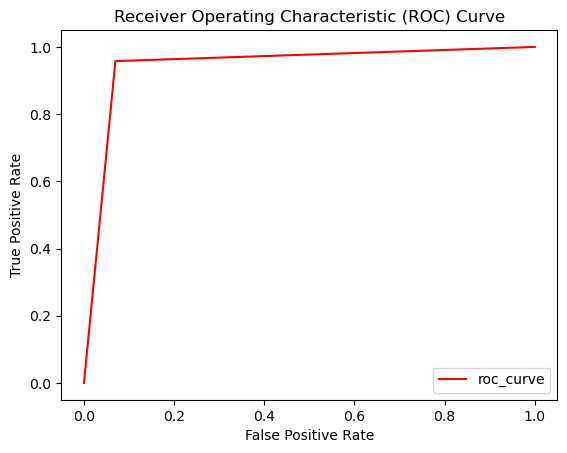

In [75]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,_ = roc_curve(y_test,y_pred_dt)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='red',label='roc_curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")


In [59]:
y_test

204    1
70     0
131    0
431    1
540    1
      ..
486    1
75     0
249    1
238    1
265    0
Name: target, Length: 114, dtype: int32

#Support Vector Machine (SVM)

3. Support Vector Machine (SVM)
How it works:
SVM finds a hyperplane that maximizes the margin (distance) between classes in the feature space. For non-linear data, it uses kernel functions (e.g., RBF) to transform the data into higher dimensions where classes become separable.

Why it’s suitable:

SVM is effective in high-dimensional spaces like this dataset (30 features).
It is robust to outliers due to its focus on the data points near the decision boundary (support vectors).
Works well with clean, standardized data (as achieved through preprocessing).


In [63]:
from sklearn.svm import SVC

In [65]:
model_3 = SVC(probability=True)
model_3.fit(x_train,y_train)

SVC(probability=True)

In [67]:
y_pred_svc = model_3.predict(x_test)

Accuracy: 0.9649122807017544
Confusion Matrix:
 [[41  2]
 [ 2 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



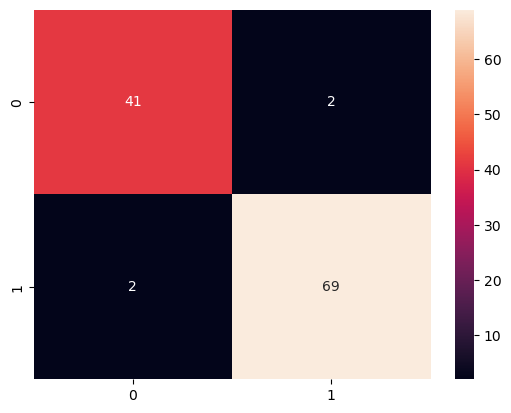

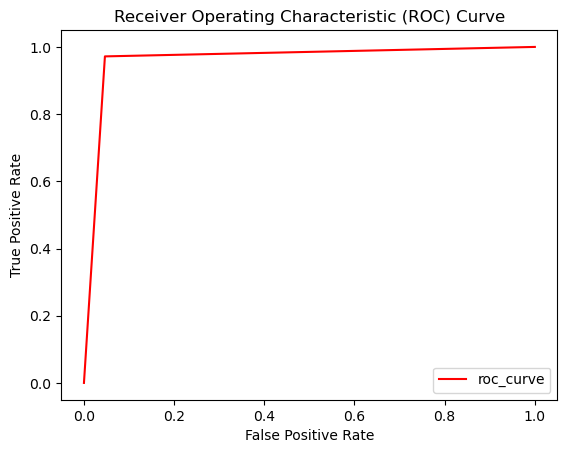

In [73]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svc)
conf_matrix = confusion_matrix(y_test, y_pred_svc)
class_report = classification_report(y_test, y_pred_svc)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

sns.heatmap(conf_matrix,annot=True)

from sklearn.metrics import roc_curve,auc
fpr,tpr,_ = roc_curve(y_test,y_pred_svc)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='red',label='roc_curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")


#4. k-Nearest Neighbors (k-NN)

How it works:
k-NN is a lazy learning algorithm that classifies a data point based on the majority class of its nearest k neighbors in the feature space. The distance is often computed using metrics like Euclidean distance.

Why it’s suitable:

Simple and intuitive, with no assumptions about the data distribution.
Effective for datasets where similar instances have similar labels.
Preprocessed data (scaled features) ensures meaningful distance calculations.


Accuracy: 0.9473684210526315
Confusion Matrix:
 [[40  3]
 [ 3 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



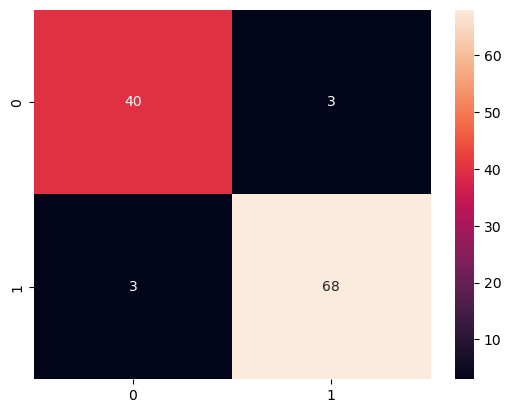

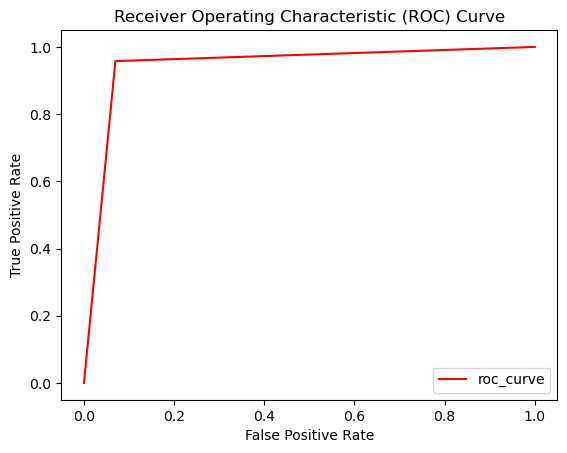

In [77]:
from sklearn.neighbors import KNeighborsClassifier

model_4 = KNeighborsClassifier()
model_4.fit(x_train,y_train)

y_pred_knn = model_4.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

sns.heatmap(conf_matrix,annot=True)

from sklearn.metrics import roc_curve,auc
fpr,tpr,_ = roc_curve(y_test,y_pred_knn)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='red',label='roc_curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")


#5. Random Forest Classifier
How it works:
Random Forest is an ensemble learning method that combines multiple decision trees. Each tree is trained on a random subset of data and features. The final prediction is made by majority voting (classification) or averaging (regression).

Why it’s suitable:

Handles non-linear relationships and noisy data effectively.
Reduces overfitting by averaging predictions from multiple trees.
Performs feature selection, focusing on the most important features.

In [79]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [81]:
# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

In [83]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

Accuracy: 0.9649122807017544
Confusion Matrix:
 [[40  3]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



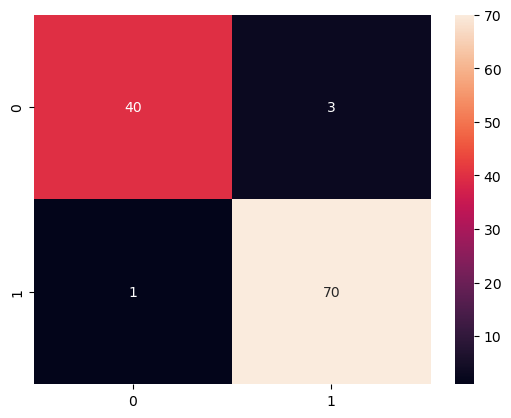

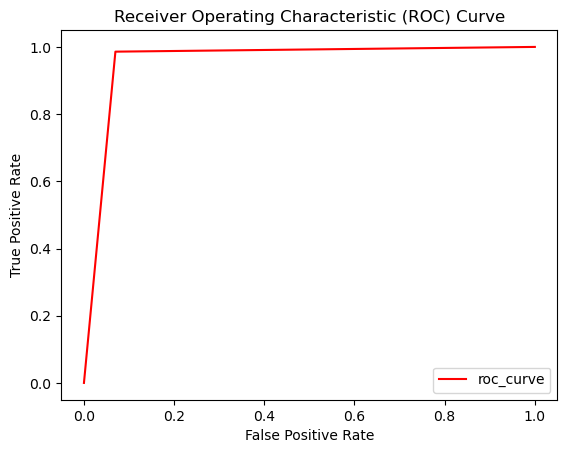

In [85]:
y_pred_rf = rf_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

sns.heatmap(conf_matrix,annot=True)

from sklearn.metrics import roc_curve,auc
fpr,tpr,_ = roc_curve(y_test,y_pred_rf)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='red',label='roc_curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")


Model Comparison - Detailed Analysis

1. Logistic Regression
Accuracy: 98.2%
Precision (Class 0): 0.98
Precision (Class 1): 0.99
Recall (Class 0): 0.98
Recall (Class 1): 0.99
F1-Score (Class 0): 0.98
F1-Score (Class 1): 0.99

Performance Overview:
Logistic Regression performed exceptionally well across all metrics, with the highest overall accuracy of 98.2%. It achieved strong precision, recall, and F1-scores for both classes, but particularly excelled in predicting class 1. This suggests that Logistic Regression is well-suited for this dataset, providing a balanced performance with minimal misclassifications.

3. Decision Tree Classifier
Accuracy: 94.7%
Precision (Class 0): 0.93
Precision (Class 1): 0.96
Recall (Class 0): 0.93
Recall (Class 1): 0.96
F1-Score (Class 0): 0.93
F1-Score (Class 1): 0.96

Performance Overview:
The Decision Tree Classifier had an accuracy of 94.7%, which is lower than Logistic Regression and Random Forest. It also showed good performance in predicting class 1, with precision and recall values of 0.96. However, its overall F1-scores were not as high as those of the Logistic Regression or Random Forest models. The Decision Tree may be prone to overfitting, especially when dealing with more complex datasets.

5. Random Forest Classifier
Accuracy: 96.5%
Precision (Class 0): 0.98
Precision (Class 1): 0.96
Recall (Class 0): 0.93
Recall (Class 1): 0.99
F1-Score (Class 0): 0.95
F1-Score (Class 1): 0.97

Performance Overview:
Random Forest performed similarly to Logistic Regression with an accuracy of 96.5%. It achieved excellent precision for class 0 (0.98) but had a slightly lower recall for class 0 (0.93). Class 1 had a near-perfect recall of 0.99, which is a strong indicator of the model's effectiveness at identifying positive cases. While the overall performance is strong, the model could benefit from improved recall for class 0.

7. Support Vector Machine (SVM)
Accuracy: 96.5%
Precision (Class 0): 0.95
Precision (Class 1): 0.97
Recall (Class 0): 0.95
Recall (Class 1): 0.97
F1-Score (Class 0): 0.95
F1-Score (Class 1): 0.97

Performance Overview:
SVM also showed a strong performance with an accuracy of 96.5%. It had good precision and recall scores for both classes. Its performance is comparable to that of Random Forest, with a balanced performance across both classes. However, it lags behind Logistic Regression in terms of overall accuracy and slightly in F1-scores. Despite this, SVM is still a solid choice for the dataset due to its ability to effectively separate the classes.

9. k-Nearest Neighbors (k-NN)
Accuracy: 94.7%
Precision (Class 0): 0.93
Precision (Class 1): 0.96
Recall (Class 0): 0.93
Recall (Class 1): 0.96
F1-Score (Class 0): 0.93
F1-Score (Class 1): 0.96

Performance Overview:
k-NN performed similarly to Decision Tree with an accuracy of 94.7%. It showed decent precision and recall for both classes, but its overall F1-scores were lower than those of the other models, making it the worst-performing algorithm in this comparison. While it is a simple and interpretable algorithm, k-NN’s performance was not as strong as the other models, particularly when compared to Logistic Regression and Random Forest.

Conclusion:

Best Performing Algorithm:
Logistic Regression is the best-performing model with the highest accuracy of 98.2%. It also provides excellent precision, recall, and F1-scores, making it a reliable choice for this dataset. The model's strong performance in both classes, particularly in predicting class 1, makes it the most suitable algorithm for this problem.

Worst Performing Algorithm:
k-Nearest Neighbors (k-NN) and Decision Tree had the lowest accuracy of 94.7%. Despite their decent results, they lag behind the other algorithms, especially in F1-scores. They may struggle with more complex data or in situations requiring higher precision and recall.

Summary:
Logistic Regression stands out as the most robust and accurate model, while k-NN and Decision Tree performed adequately but did not match the other models. Random Forest and SVM showed comparable results, with high accuracy and balanced performance across both classes.